# Proyek Analisis Data: Air Quality
- **Nama:** Muhammad Bugi Satrio Marandhany
- **Email:** muhbugisatrio@gmail.com
- **ID Dicoding:** bugi-satrio

## Menentukan Pertanyaan Bisnis

- Dimana tempat dengan kualitas udara
  terbaik dan terburuk ?
- Bagaimana Kondisi kualitas udara dari tahun ke
  tahun ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

In [3]:
autizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

datasets = {
    "Aotizhongxin": autizhongxin_df,
    "Changping": changping_df,
    "Dingling": dingling_df,
    "Dongsi": dongsi_df,
    "Guanyuan": guanyuan_df,
    "Gucheng": gucheng_df,
    "Huairou": huairou_df,
    "Nongzhanguan": nongzhanguan_df,
    "Shunyi": shunyi_df,
    "Tiantan": tiantan_df,
    "Wanliu": wanliu_df,
    "Wanshouxigong": wanshouxigong_df,
}


df_final = pd.concat(datasets.values(), ignore_index=True)

**Insight:**
- berikut adalah dataset berisi data
  kualitas udara di beberapa lokasi di beijing
- dataset sudah digabung menjadi satu dataframe besar yaitu df_final

### Assessing Data

In [4]:
print(df_final.isnull().sum())

print(df_final.isnull().sum().sum())

print(df_final.describe(include='all'))

print(df_final.duplicated().sum().sum())

print(df_final.dtypes)

numerical_columns = df_final.select_dtypes(include=['float64', 'int64'])

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

outliers = (numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))

outlier_data = df_final[outliers.any(axis=1)]
print(outlier_data)

# batas_atas_PM2_5 = 100
# batas_atas_PM10 = 100
# batas_atas_SO2 = 50
# batas_atas_NO2 = 50
# batas_atas_CO = 9
# batas_atas_O3 = 0.1


# batas_bawah = 0

# invalid_condition = (
#     (df_final['PM2.5'] < batas_bawah) | (df_final['PM2.5'] > batas_atas_PM2_5) |
#     (df_final['PM10'] < batas_bawah) | (df_final['PM10'] > batas_atas_PM10) |
#     (df_final['SO2'] < batas_bawah) | (df_final['SO2'] > batas_atas_SO2) |
#     (df_final['NO2'] < batas_bawah) | (df_final['NO2'] > batas_atas_NO2) |
#     (df_final['CO'] < batas_bawah) | (df_final['CO'] > batas_atas_CO) |
#     (df_final['O3'] < batas_bawah) | (df_final['O3'] > batas_atas_O3)
# )

# invalid_data = df_final[invalid_condition]

# print(invalid_data)





No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64
74027
                   No           year          month            day  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     17532.500000    2014.662560       6.522930      15.729637   
std      10122.116943       1.177198       3.448707       8.800102   
min          1.000000    2013.000000       1.000000       1.000000   
25%       8766.750000    2014.000000       4.000000       8.000000   
50%      17532.500000    2015.000000       7.

**Insight:**
- ada 74027 data yang bernilai null
- tidak ada data yang duplikat
- tidak ada outlier dan data yang bernilai tidak masuk akal

### Cleaning Data

In [5]:
df_final['wd'] = df_final.groupby('station')['wd'].apply(lambda x: x.fillna(x.mode()[0])).reset_index(drop=True)

numeric_columns = df_final.select_dtypes(include=['float64', 'int64']).columns

df_interpolated = df_final[numeric_columns].interpolate(method='linear', axis=0)

df_interpolated = df_interpolated.join(df_final.drop(columns=numeric_columns))

df_interpolated['RAIN'] = df_interpolated['RAIN'].interpolate(method='polynomial', order=2)

df_interpolated['date'] = pd.to_datetime(df_interpolated[['year', 'month', 'day', 'hour']])

df_interpolated.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)


print(df_interpolated)

kolom_numerik = df_interpolated.select_dtypes(include=['float64', 'int64']).columns

skewness = df_interpolated[kolom_numerik].skew()
print(skewness)

print(df_interpolated.describe())

df_interpolated.to_csv('data.csv', index=False)

           No  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN  \
0           1    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0   
1           2    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0   
2           3    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0   
3           4    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   
4           5    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0   
...       ...    ...   ...   ...   ...    ...   ...   ...     ...   ...   ...   
420763  35060   11.0  32.0   3.0  24.0  400.0  72.0  12.5  1013.5 -16.2   0.0   
420764  35061   13.0  32.0   3.0  41.0  500.0  50.0  11.6  1013.6 -15.1   0.0   
420765  35062   14.0  28.0   4.0  38.0  500.0  54.0  10.8  1014.2 -13.3   0.0   
420766  35063   12.0  23.0   4.0  30.0  400.0  59.0  10.5  1014.4 -12.9   0.0   
420767  35064   13.0  19.0   4.0  38.0  600.0  49.0   8.6  1014.1 -15.9   0.0   

        WSPM   wd        st

**Insight:**
- Mengisi data tipe integer dan float yang bernilai null dengan interpolasi data linear
- Dan mengisi data tipe object yang bersifat null berdasarkan data yang paling sering muncul yang dikelompokkan dengan station
- mendownload hasil dari df_interpolated menjadi data.csv untuk dipakai di dashboard

## Exploratory Data Analysis (EDA)

### Explore ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   PM2.5    420768 non-null  float64       
 2   PM10     420768 non-null  float64       
 3   SO2      420768 non-null  float64       
 4   NO2      420768 non-null  float64       
 5   CO       420768 non-null  float64       
 6   O3       420768 non-null  float64       
 7   TEMP     420768 non-null  float64       
 8   PRES     420768 non-null  float64       
 9   DEWP     420768 non-null  float64       
 10  RAIN     420768 non-null  float64       
 11  WSPM     420768 non-null  float64       
 12  wd       420768 non-null  object        
 13  station  420768 non-null  object        
 14  date     420768 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 48.2+ MB
None
                  N

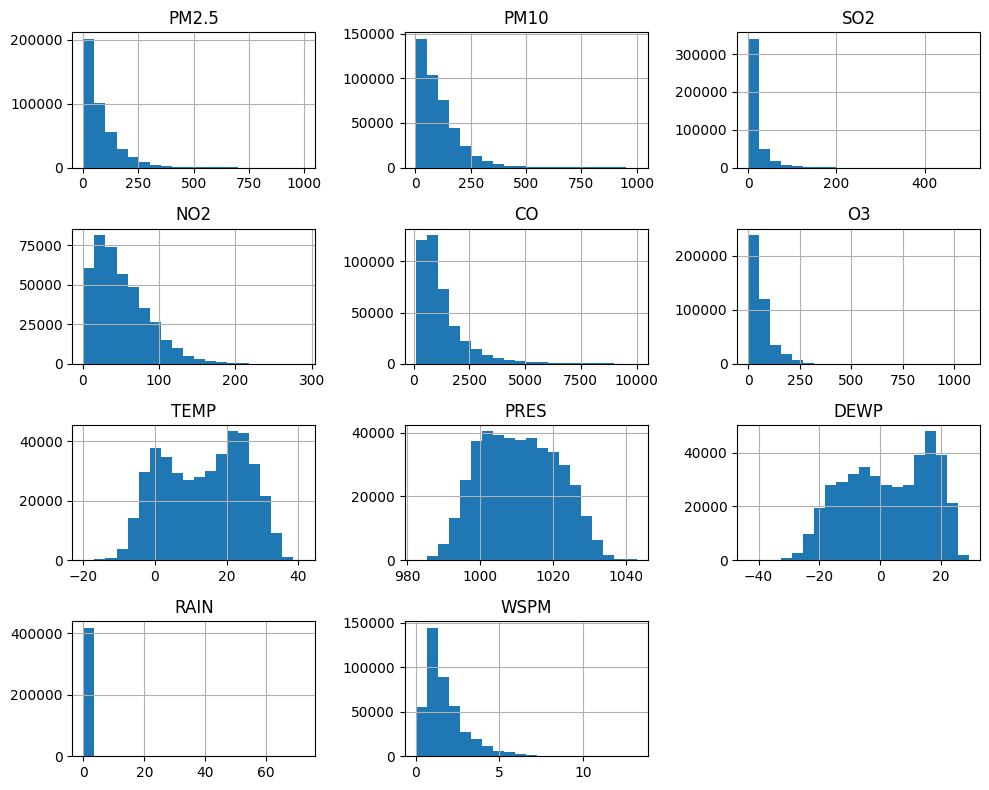

In [54]:
print(df_interpolated.info())
print(df_interpolated.describe())
print(df_interpolated.isnull().sum())
print(df_interpolated.duplicated().sum())
df_interpolated[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

**Insight:**
- sudah tidak terdapat data yang nilainya null ataupun duplikat
- untuk kolom Rain yang mempunyai Skewness yang tinggi, saya tidak menyesuaikannya karena curah hujan merupakan hal yang alamiah dan mungkin saja hujan turun sangat deras ataupun tidak ada hujan sama sekali

## Visualization & Explanatory Analysis

### Pertanyaan 1:

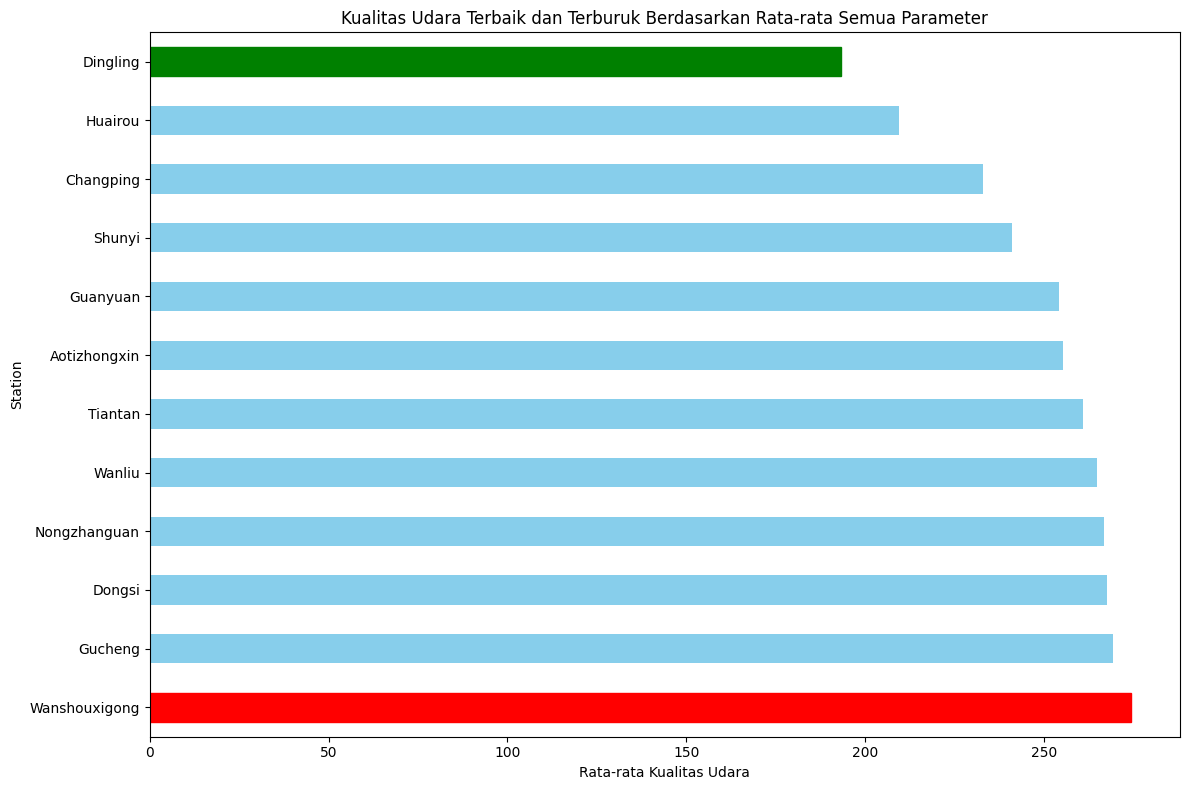

In [75]:
columns_to_consider = ['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'WSPM']
station_avg = df_interpolated.groupby('station')[columns_to_consider].mean()

station_avg['overall_avg'] = station_avg.mean(axis=1)

station_avg_sorted = station_avg['overall_avg'].sort_values(ascending=False)

best_station = station_avg_sorted.idxmin()
worst_station = station_avg_sorted.idxmax()

plt.figure(figsize=(12, 8))
bar = station_avg_sorted.plot(kind='barh', color='skyblue')

bars = bar.patches

best_station_index = station_avg_sorted.index.get_loc(best_station)
worst_station_index = station_avg_sorted.index.get_loc(worst_station)

bars[best_station_index].set_color('green')
bars[worst_station_index].set_color('red')

plt.title('Kualitas Udara Terbaik dan Terburuk')
plt.ylabel('Station')
plt.xlabel('Rata-rata Kualitas Udara')
plt.tight_layout()

plt.show()

### Pertanyaan 2:

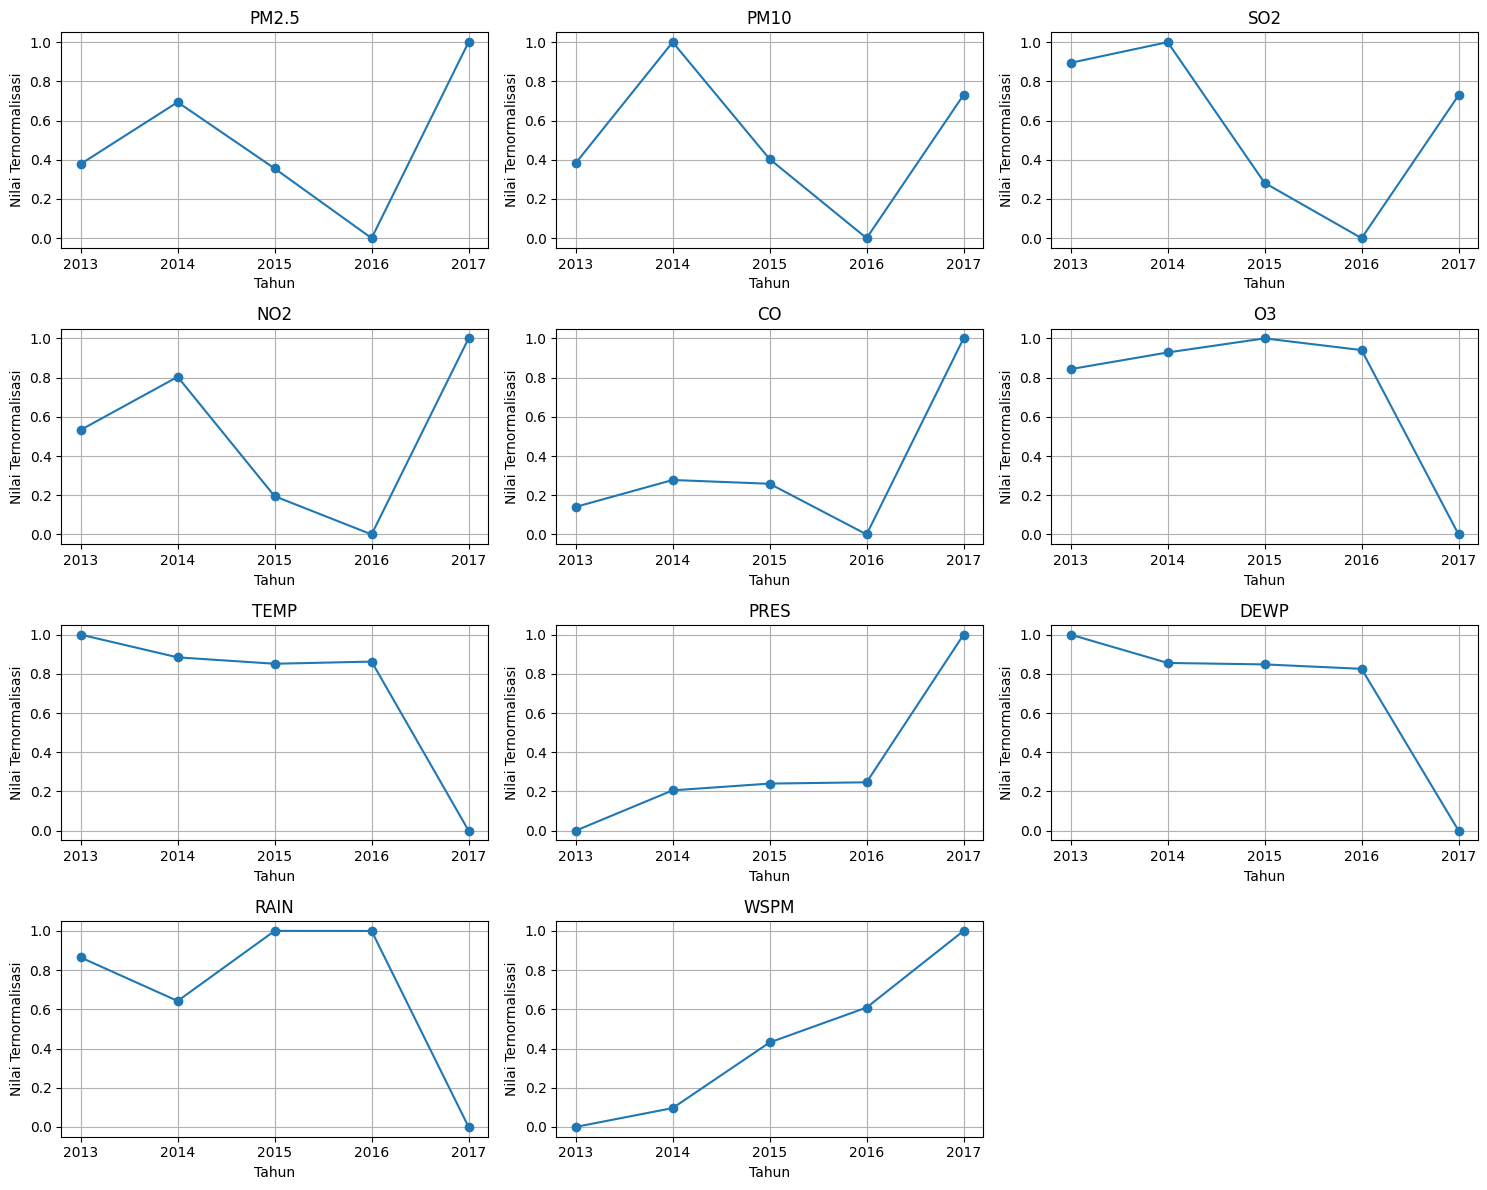

In [85]:
df_interpolated['date'] = pd.to_datetime(df_interpolated['date'])

df_interpolated['year'] = df_interpolated['date'].dt.year

params = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
yearly_avg = df_interpolated.groupby('year')[params].mean()

yearly_avg_norm = (yearly_avg - yearly_avg.min()) / (yearly_avg.max() - yearly_avg.min())

yearly_avg_norm.index = yearly_avg_norm.index.astype(int)

n_params = len(yearly_avg_norm.columns)
ncols = 3
nrows = int(np.ceil(n_params / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*3))
axes = axes.flatten()

for i, column in enumerate(yearly_avg_norm.columns):
    axes[i].plot(yearly_avg_norm.index, yearly_avg_norm[column], marker='o', linestyle='-')
    axes[i].set_title(column)
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel('Nilai Ternormalisasi')
    axes[i].grid(True)
    axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- untuk pertanyaan yang pertama, yaitu "Dimana tempat dengan kualitas udara terbaik dan terburuk ?" berikut adalah horizontal bar chart yang mengambil rata rata dari semua parameter untuk setiap station dan dibandingkan untuk mencari tempat dengan kualitas udara terbaik dan terburuk
- untuk pertanyaan yang kedua, yaitu "Bagaimana Kondisi kualitas udara dari tahun ke tahun ?" berikut adalah line chart untuk melihat perubahan kualitas udara di setiap tahunya

## Analisis Lanjutan (Opsional)

In [92]:
df_interpolated['date'] = pd.to_datetime(df_interpolated['date'])

recency = df_interpolated.groupby('station')['date'].max()
recency = (df_interpolated['date'].max() - recency).dt.days


frequency = df_interpolated['station'].value_counts()

monetary = df_interpolated.groupby('station')['PM2.5'].mean()

rfm = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

rfm['R_Score'] = rfm['Recency'].rank(method='max', ascending=False).astype(int)
rfm['F_Score'] = rfm['Frequency'].rank(method='max', ascending=True).astype(int)
rfm['M_Score'] = rfm['Monetary'].rank(method='max', ascending=True).astype(int)

rfm['R_Score'] = 3
rfm['F_Score'] = 3
rfm['M_Score'] = pd.qcut(rfm['M_Score'], 5, labels=range(1, 6))

print(rfm)

               Recency  Frequency   Monetary  R_Score  F_Score M_Score
station                                                               
Aotizhongxin         0      35064  82.540623        3        3       3
Changping            0      35064  70.986438        3        3       1
Dingling             0      35064  66.845557        3        3       1
Dongsi               0      35064  86.144243        3        3       5
Guanyuan             0      35064  82.897522        3        3       3
Gucheng              0      35064  84.074802        3        3       4
Huairou              0      35064  69.501747        3        3       1
Nongzhanguan         0      35064  85.079472        3        3       5
Shunyi               0      35064  79.437962        3        3       2
Tiantan              0      35064  82.033097        3        3       2
Wanliu               0      35064  83.467612        3        3       4
Wanshouxigong        0      35064  85.067548        3        3       5


**insight**
- Recency : pengukuran terakhir dilakukan secara bersamaan di setiap stasiun
- Frequency : jumlah pengukuran untuk setiap stasiun sama
- Monetary : rata rata polusi udara setiap stasiun berbeda, dengan Dongsi dan Nongzhanguan yang memiliki rata rata tertinggi

## Conclusion

- dengan menggunakan bar chart untuk menentukan tempat mana yang mempunyai kualitas udara terbaik dan terburuk
- dan untuk perubahan kualitas udara tahun ke tahun menggunakan line chart serta parameternya disesuaikan agar setara antara satu kolom dengan kolom lain